<a href="https://colab.research.google.com/github/xanasa14/MLImplementations/blob/master/NaiveBayesFromOfflineDatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np, pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

In [30]:
#importing our cancer dataset
dataset = pd.read_csv('/content/Errors.csv')


#X = dataset['radius mean', 'texture mean', 'perimeter mean', 'area_mean','smoothness_mean','compactness mean','concavity mean','concave points mean','symmetry mean','fractal dimension mean','radius se' ]
col_list = ['id', 'label', 'Description']
df = pd.read_csv("/content/Errors.csv", usecols=col_list)#dataset['diagnosis']
#Setting our X and Y for trainig and testing 
X  = df['Description']
Y = dataset['label']

In [31]:
#X and y split to train and test

#y = df['label']
#X = df.drop('label', axis=1)

In [32]:
#print(X)
print(y)

0                    Reset the PC
1                    Reset the PC
2                    Reset the PC
3                    Reset the PC
4     Just wait until it responds
5     Just wait until it responds
6      Close task in Task Manager
7      Close task in Task Manager
8                    Reset the PC
9                    Reset the PC
10                   Reset the PC
11                   Reset the PC
12                   Reset the PC
13    Just wait until it responds
14    Just wait until it responds
15     Close task in Task Manager
16     Close task in Task Manager
Name: label, dtype: object


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)

print("\nX_train:\n")
print(y_train.head())
print(y_train.shape)

print("\nX_test:\n")
print(y_test.head())
print(y_test.shape)


X_train:

9     Its been frozen for a very long time 
4                           It says to wait
13    The operator said that I have to wait
15                   Nothing is responding 
5                           Told me to wait
Name: Description, dtype: object
(13,)

X_test:

11    The cursor is not moving 
6          It is not responding
2          Cant move the cursor
3             Cant do anything 
Name: Description, dtype: object
(4,)

X_train:

9                    Reset the PC
4     Just wait until it responds
13    Just wait until it responds
15     Close task in Task Manager
5     Just wait until it responds
Name: label, dtype: object
(13,)

X_test:

11                  Reset the PC
6     Close task in Task Manager
2                   Reset the PC
3                   Reset the PC
Name: label, dtype: object
(4,)


In [36]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(X_train, y_train)
# Predict the categories of the test data
predicted_categories = model.predict(y)
print(predicted_categories)

['Close task in Task Manager' 'Close task in Task Manager'
 'Close task in Task Manager' 'Close task in Task Manager'
 'Just wait until it responds' 'Just wait until it responds'
 'Reset the PC' 'Reset the PC' 'Close task in Task Manager'
 'Close task in Task Manager' 'Close task in Task Manager'
 'Close task in Task Manager' 'Close task in Task Manager'
 'Just wait until it responds' 'Just wait until it responds'
 'Reset the PC' 'Reset the PC']


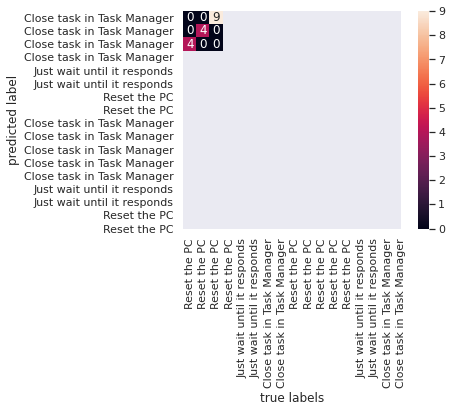

The accuracy is 0.23529411764705882


In [40]:
# plot the confusion matrix
mat = confusion_matrix(y, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=y,yticklabels=predicted_categories)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y, predicted_categories)))
#he accuracy is 0.7738980350504514